In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [2]:
df=pd.read_csv("financial_loan.csv")

In [32]:
df

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,Charged Off,2021-05-13,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,Charged Off,2021-02-09,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,Fully Paid,2021-04-12,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,Fully Paid,2021-02-15,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,Current,2021-06-16,992381,wedding,C1,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,Current,2021-06-16,1192039,wedding,C1,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,Current,2021-06-16,1089898,wedding,D5,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,Current,2021-06-16,1194971,wedding,D5,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677


In [31]:
pd.set_option('display.max_columns',24)

In [7]:
count = df['id'].count()
print("Total Loan Applicants:", count)

Total Loan Applicants: 38576


In [5]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
max_date_rows = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]
MTD_Loan_applicants = max_date_rows['id'].count()
print("MTD_Loan_applicants:", MTD_Loan_applicants)

MTD_Loan_applicants: 4314


In [8]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_Loan_applicants = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['id'].count()
previous_max_issue_date = max_issue_date - pd.DateOffset(months=1)
PMTD_Loan_applicants = df[(df['issue_date'].dt.month == previous_max_issue_date.month) & (df['issue_date'].dt.year == previous_max_issue_date.year)]['id'].count()
MOM_Loan_applicants = ((MTD_Loan_applicants - PMTD_Loan_applicants) / PMTD_Loan_applicants) * 100
print("MOM_Loan_applicants:", MOM_Loan_applicants)

MOM_Loan_applicants: 6.91449814126394


In [9]:
sum=df['loan_amount'].sum()
print("Total Loan Amount: ",sum)

Total Loan Amount:  435757075


In [10]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_Loan_amount = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['loan_amount'].sum()
print("MTD Loan amount:", MTD_Loan_amount)

MTD Loan amount: 53981425


In [11]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_Loan_amount = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['loan_amount'].sum()
previous_max_issue_date = max_issue_date - pd.DateOffset(months=1)
PMTD_Loan_amount = df[(df['issue_date'].dt.month == previous_max_issue_date.month) & (df['issue_date'].dt.year == previous_max_issue_date.year)]['loan_amount'].sum()
MOM_Loan_amount = ((MTD_Loan_amount - PMTD_Loan_amount) / PMTD_Loan_amount) * 100
print("MOM Loan amount:", MOM_Loan_amount)

MOM Loan amount: 13.038682478681473


In [12]:
sum=df['total_payment'].sum()
print("Total Amount Recieved: ",sum)

Total Amount Recieved:  473070933


In [14]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_amount_recieved = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['total_payment'].sum()
print("MTD amount recieved:", MTD_amount_recieved)

MTD amount recieved: 58074380


In [16]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_total_amount_recieved = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['total_payment'].sum()
previous_max_issue_date = max_issue_date - pd.DateOffset(months=1)
PMTD_total_amount_recieved = df[(df['issue_date'].dt.month == previous_max_issue_date.month) & (df['issue_date'].dt.year == previous_max_issue_date.year)]['total_payment'].sum()
MOM_Amount_recieved = ((MTD_total_amount_recieved - PMTD_total_amount_recieved) / PMTD_total_amount_recieved) * 100
print("MOM_Amount_recieved:", MOM_Amount_recieved)

MOM_Amount_recieved: 15.842865329810104


In [17]:
average_interest_rate = df['int_rate'].mean() * 100

print("Average interest rate:", average_interest_rate)

Average interest rate: 12.048831397760265


In [19]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
average_interest_rate = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['int_rate'].mean() * 100
print("MTD_Average_interest:", average_interest_rate)

MTD_Average_interest: 12.356040797403804


In [20]:
df['issue_date'] = pd.to_datetime(df['issue_date'])
max_issue_date = df['issue_date'].max()
MTD_average_interest_rate = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['int_rate'].mean()
PMTD_average_interest_rate = df[(df['issue_date'].dt.month == max_issue_date.month - 1) & (df['issue_date'].dt.year == max_issue_date.year)]['int_rate'].mean()
MOM_average_interest = ((MTD_average_interest_rate - PMTD_average_interest_rate) / PMTD_average_interest_rate) * 100
print("MOM_average_interest:", MOM_average_interest)

MOM_average_interest: 3.469545534402306


In [21]:
average_dti = df['dti'].mean()

print("Average DTI:", average_dti)

Average DTI: 0.13327433119037743


In [22]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

max_issue_date = df['issue_date'].max()

MTD_average_dti = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]['dti'].mean()

print("MTD_average_dti:", MTD_average_dti)

MTD_average_dti: 0.13665537783959206


In [24]:
good_loan = df[df['loan_status'].isin(['Fully Paid', 'Current'])]['id'].count()

print("Total good Loan Applicants:", good_loan)

Total good Loan Applicants: 33243


In [25]:
good_loan_amount = df[df['loan_status'].isin(['Fully Paid', 'Current'])]['loan_amount'].sum()

print("Total loan amount for good loans:", good_loan_amount)

Total loan amount for good loans: 370224850


In [26]:
good_loan_amount_received = df[df['loan_status'].isin(['Fully Paid', 'Current'])]['total_payment'].sum()

print("Total amount received for good loans:", good_loan_amount_received)

Total amount received for good loans: 435786170


In [33]:
bad_loan = df[df['loan_status'] == 'Charged Off']['id'].count()

print("Total Bad Loan Apllicants:", bad_loan)

Total Bad Loan Apllicants: 5333


In [34]:
bad_loan_amount = df[df['loan_status'].isin(['Charged Off'])]['loan_amount'].sum()

print("Total loan amount for bad loans:", bad_loan_amount)

Total loan amount for bad loans: 65532225


In [35]:
bad_loan_amount_received = df[df['loan_status'].isin(['Charged Off'])]['total_payment'].sum()

print("Total amount received for bad loans:", bad_loan_amount_received)

Total amount received for bad loans: 37284763


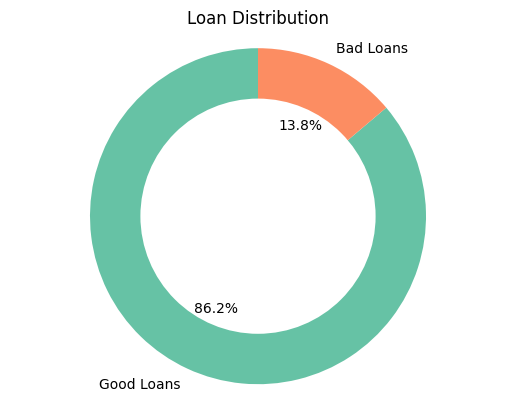

In [40]:
good_loan_count = df[df['loan_status'].isin(['Fully Paid', 'Current'])]['id'].count()
bad_loan_count = df[df['loan_status'] == 'Charged Off']['id'].count()

total_loans = good_loan_count + bad_loan_count
good_loan_percentage = (good_loan_count / total_loans) * 100
bad_loan_percentage = (bad_loan_count / total_loans) * 100

labels = ['Good Loans', 'Bad Loans']
sizes = [good_loan_percentage, bad_loan_percentage]
colors = ['#66c2a5', '#fc8d62']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis('equal')  
plt.title('Loan Distribution')
plt.show()

In [42]:
summary_stats = df.groupby('loan_status').agg(
    total_loan_applicants=('id', 'count'),
    total_loan_amount=('loan_amount', 'sum'),
    total_amount_received=('total_payment', 'sum'),
    interest_rate=('int_rate', lambda x: x.mean() * 100),
    average_dti=('dti', lambda x: x.mean() * 100)
).reset_index()

print(summary_stats.to_string(index=False))

loan_status  total_loan_applicants  total_loan_amount  total_amount_received  interest_rate  average_dti
Charged Off                   5333           65532225               37284763      13.878575    14.004733
    Current                   1098           18866500               24199914      15.099326    14.724344
 Fully Paid                  32145          351358350              411586256      11.641071    13.167351


In [43]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

max_issue_date = df['issue_date'].max()

filtered_df = df[(df['issue_date'].dt.month == max_issue_date.month) & (df['issue_date'].dt.year == max_issue_date.year)]

summary_stats = filtered_df.groupby('loan_status').agg(
    MTD_total_loan_amount=('loan_amount', 'sum'),
    MTD_total_amount_received=('total_payment', 'sum')
).reset_index()

print(summary_stats.to_string(index=False))

loan_status  MTD_total_loan_amount  MTD_total_amount_received
Charged Off                8732775                    5324211
    Current                3946625                    4934318
 Fully Paid               41302025                   47815851


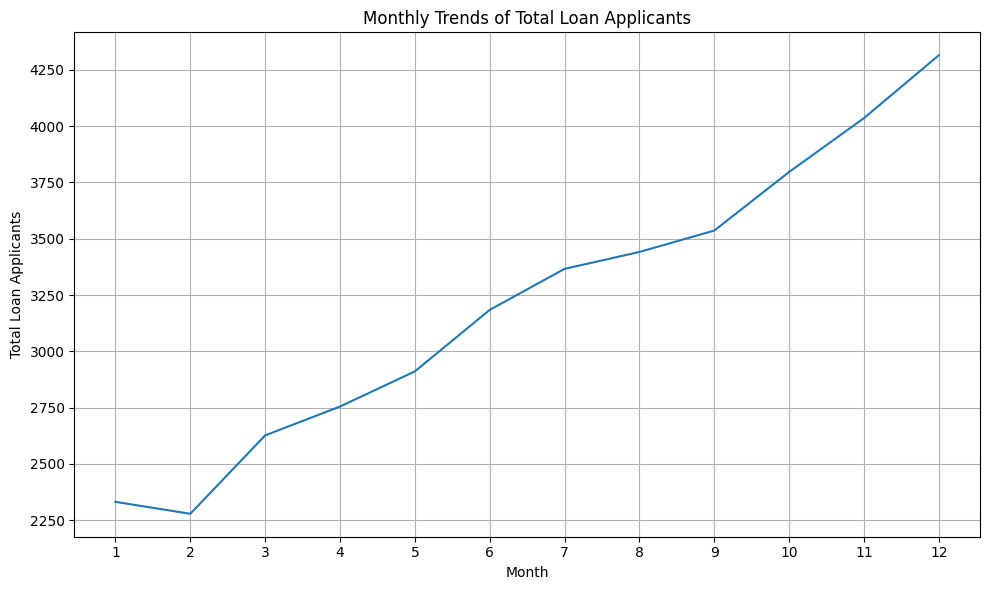

In [53]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

monthly_loan_applicants = df.groupby(['year', 'month']).size().reset_index(name='total_loan_applicants')

plt.figure(figsize=(10, 6))
plt.plot(monthly_loan_applicants.index, monthly_loan_applicants['total_loan_applicants'])
plt.title('Monthly Trends of Total Loan Applicants')
plt.xlabel('Month')
plt.ylabel('Total Loan Applicants')
plt.xticks(range(len(monthly_loan_applicants)), monthly_loan_applicants['month'])
plt.grid(True)
plt.tight_layout()
plt.show()


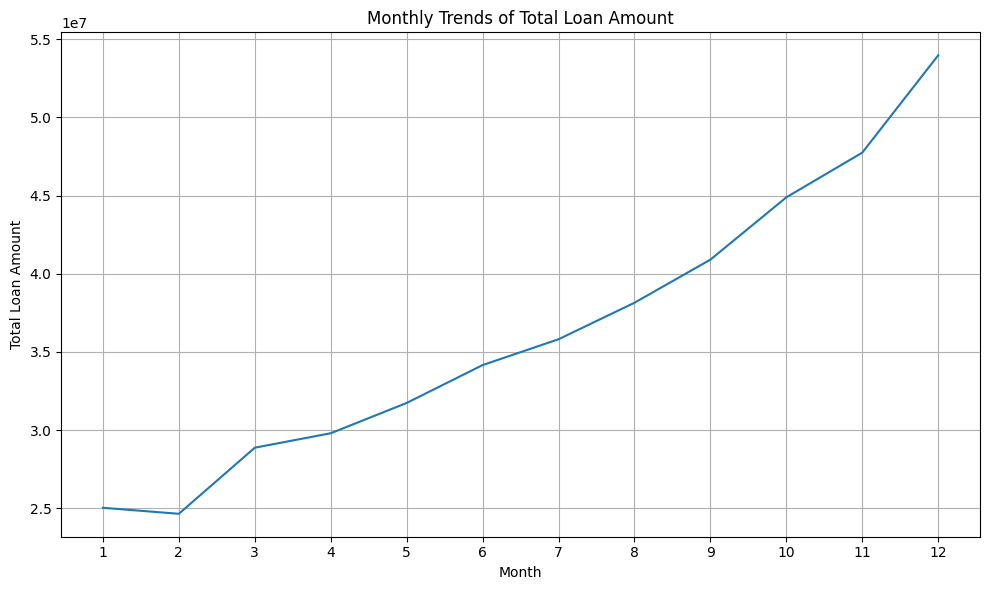

In [56]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

monthly_loan_amount = df.groupby(['year', 'month'])['loan_amount'].sum().reset_index(name='total_loan_amount')

plt.figure(figsize=(10, 6))
plt.plot(monthly_loan_amount.index, monthly_loan_amount['total_loan_amount'])
plt.title('Monthly Trends of Total Loan Amount')
plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.xticks(range(len(monthly_loan_amount)), monthly_loan_amount['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

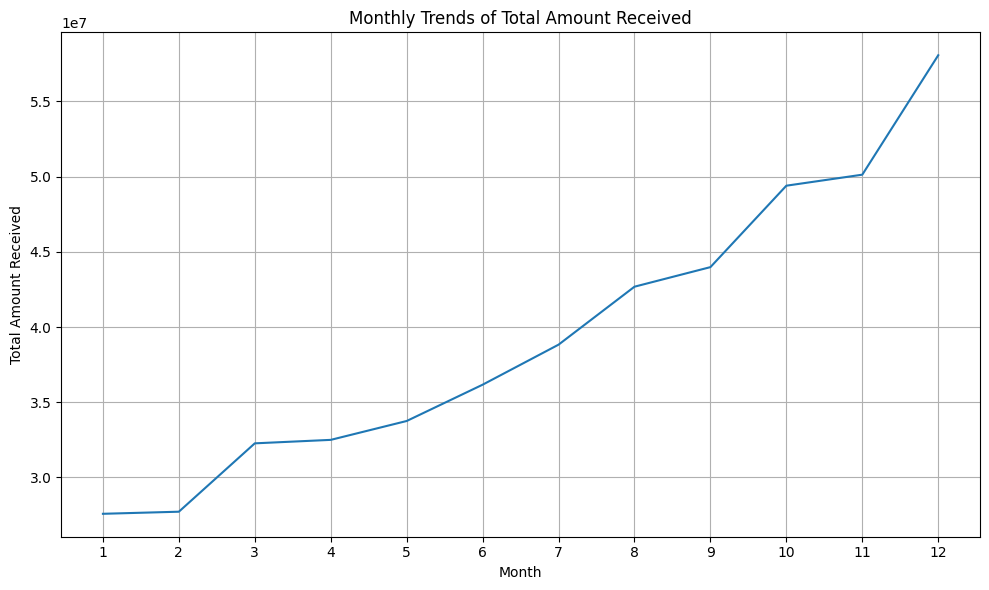

In [57]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

df['month'] = df['issue_date'].dt.month
df['year'] = df['issue_date'].dt.year

monthly_amount_received = df.groupby(['year', 'month'])['total_payment'].sum().reset_index(name='total_amount_received')

plt.figure(figsize=(10, 6))
plt.plot(monthly_amount_received.index, monthly_amount_received['total_amount_received'])
plt.title('Monthly Trends of Total Amount Received')
plt.xlabel('Month')
plt.ylabel('Total Amount Received')
plt.xticks(range(len(monthly_amount_received)), monthly_amount_received['month'])
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
result = df.groupby('address_state').agg(
    total_loan_applicants=('id', 'count'),
    total_loan_amount=('loan_amount', 'sum'),
    total_amount_received=('total_payment', 'sum')
)

result = result.sort_values(by='total_loan_amount', ascending=False)

print(result)

               total_loan_applicants  total_loan_amount  total_amount_received
address_state                                                                 
CA                              6894           78484125               83901234
NY                              3701           42077050               46108181
TX                              2664           31236650               34392715
FL                              2773           30046125               31601905
NJ                              1822           21657475               23425159
...                              ...                ...                    ...
IN                                 9              86225                  85521
ID                                 6              59750                  65329
IA                                 5              56450                  64482
NE                                 5              31700                  24542
ME                                 3               9

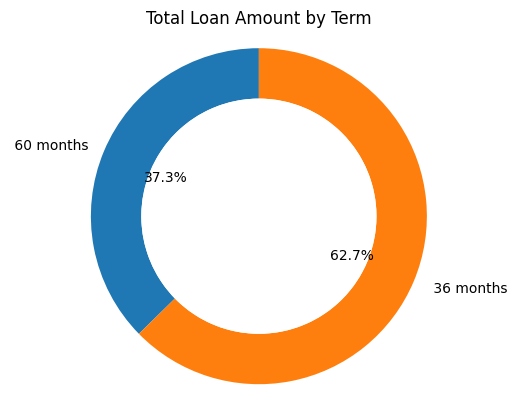

In [60]:
result = df.groupby('term').agg(
    total_loan_applicants=('id', 'count'),
    total_loan_amount=('loan_amount', 'sum'),
    total_amount_received=('total_payment', 'sum')
)

result = result.sort_values(by='total_loan_amount')

fig, ax = plt.subplots()
ax.pie(result['total_loan_amount'], labels=result.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.axis('equal') 

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Total Loan Amount by Term')
plt.show()

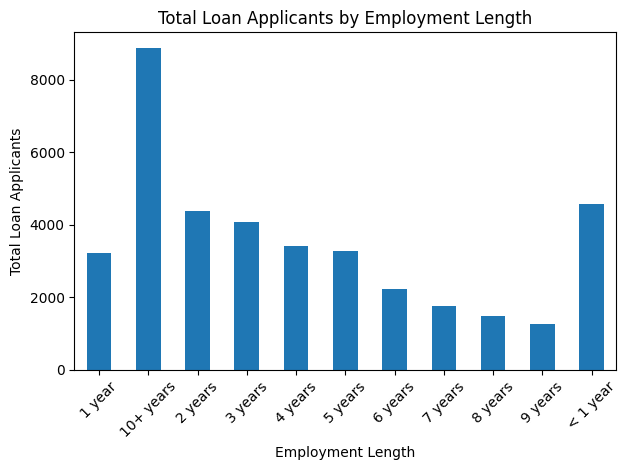

In [61]:
result = df.groupby('emp_length').agg(
    total_loan_applicants=('id', 'count')
).sort_index()

result.plot(kind='bar', legend=None)

plt.xlabel('Employment Length')
plt.ylabel('Total Loan Applicants')
plt.title('Total Loan Applicants by Employment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

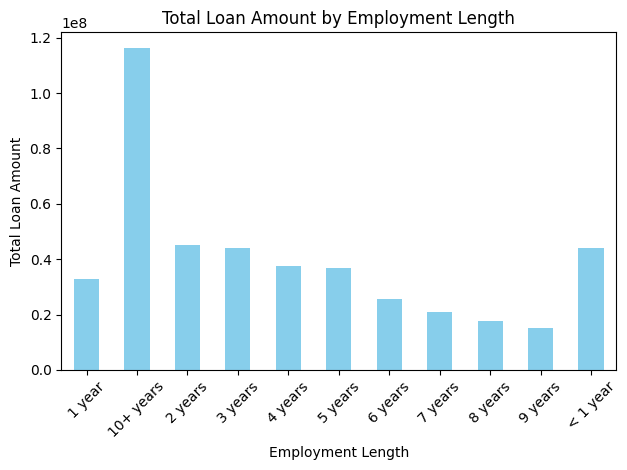

In [62]:
result = df.groupby('emp_length').agg(
    total_loan_amount=('loan_amount', 'sum')
).sort_index()

result.plot(kind='bar', legend=None, color='skyblue')

plt.xlabel('Employment Length')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Employment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

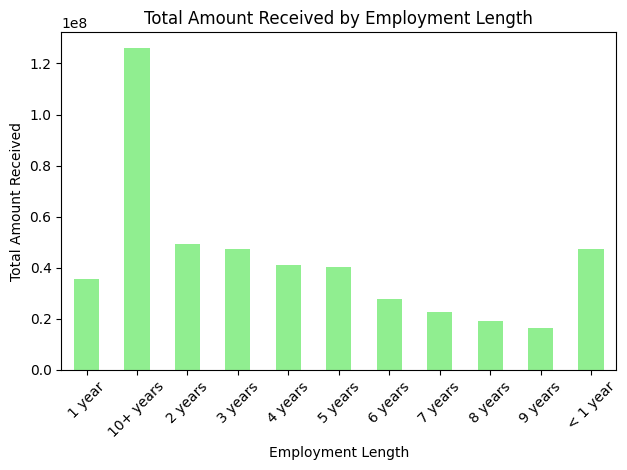

In [63]:
result = df.groupby('emp_length').agg(
    total_amount_received=('total_payment', 'sum')
).sort_index()

result.plot(kind='bar', legend=None, color='lightgreen')

plt.xlabel('Employment Length')
plt.ylabel('Total Amount Received')
plt.title('Total Amount Received by Employment Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

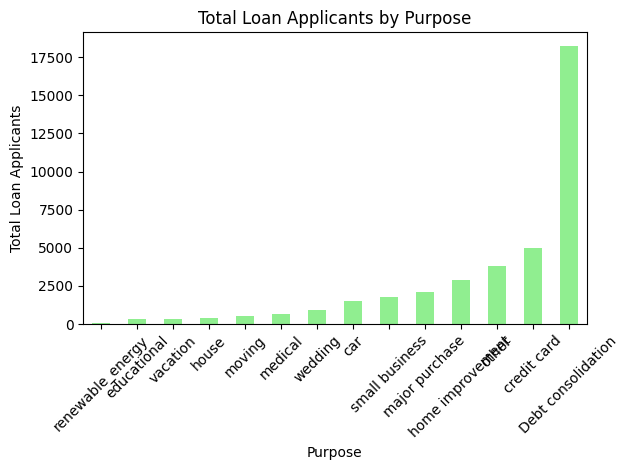

In [66]:
result = df.groupby('purpose').agg(
    total_loan_applicants=('id', 'count')
).sort_values(by='total_loan_applicants')

result.plot(kind='bar', y='total_loan_applicants', legend=None, color='lightgreen')

plt.xlabel('Purpose')
plt.ylabel('Total Loan Applicants')
plt.title('Total Loan Applicants by Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

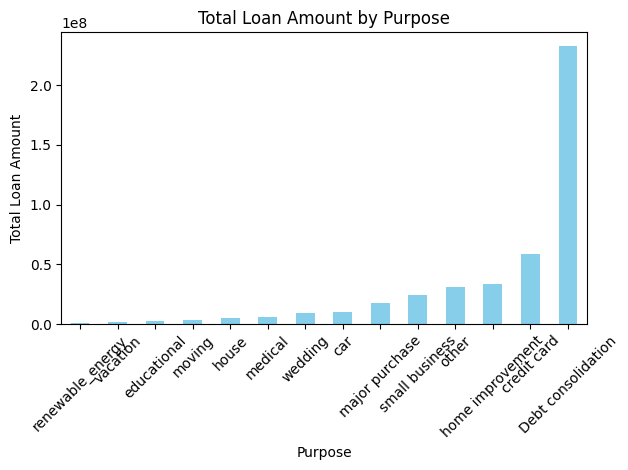

In [67]:
result = df.groupby('purpose').agg(
    total_loan_amount=('loan_amount', 'sum')
).sort_values(by='total_loan_amount')

result.plot(kind='bar', y='total_loan_amount', legend=None, color='skyblue')

plt.xlabel('Purpose')
plt.ylabel('Total Loan Amount')
plt.title('Total Loan Amount by Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

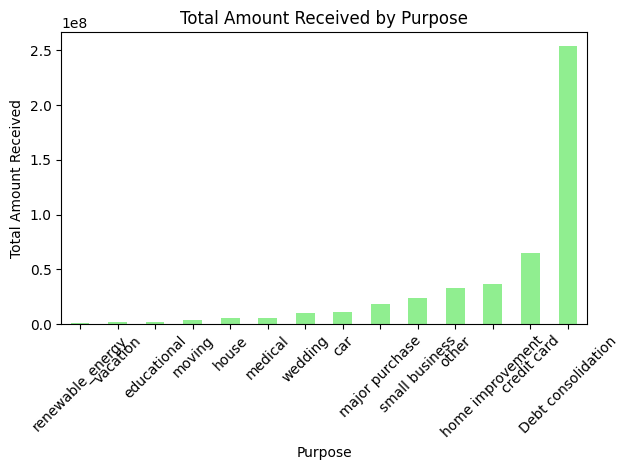

In [68]:
result = df.groupby('purpose').agg(
    total_amount_received=('total_payment', 'sum')
).sort_values(by='total_amount_received')

result.plot(kind='bar', y='total_amount_received', legend=None, color='lightgreen')

plt.xlabel('Purpose')
plt.ylabel('Total Amount Received')
plt.title('Total Amount Received by Purpose')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

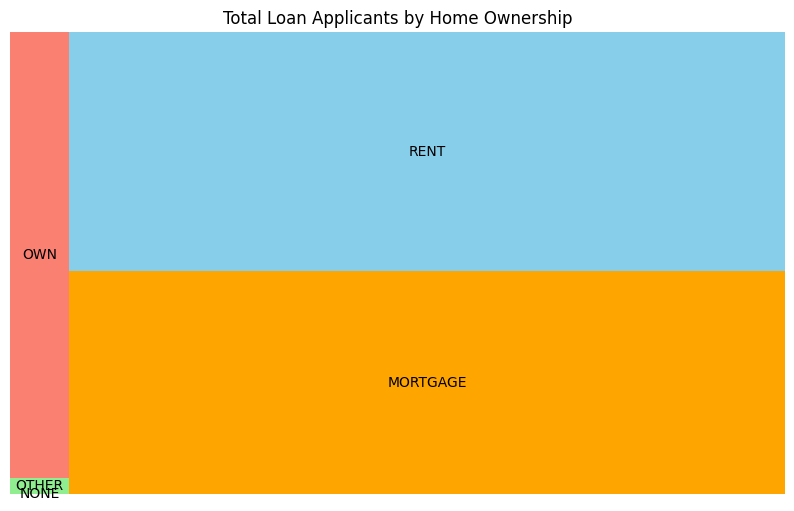

In [70]:
result = df.groupby('home_ownership').agg(
    total_loan_applicants=('id', 'count')
).sort_values(by='total_loan_applicants')

plt.figure(figsize=(10, 6))
squarify.plot(sizes=result['total_loan_applicants'], label=result.index, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Total Loan Applicants by Home Ownership')
plt.axis('off')  
plt.show()

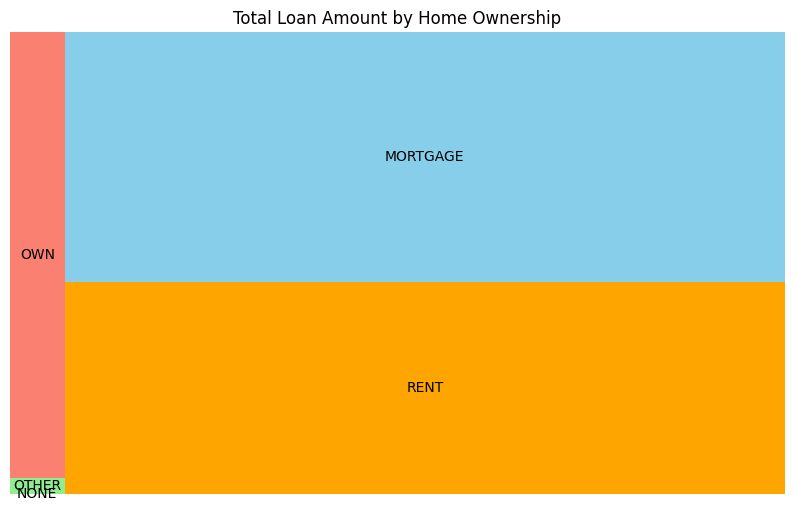

In [72]:
result = df.groupby('home_ownership').agg(
    total_loan_amount=('loan_amount', 'sum')
).sort_values(by='total_loan_amount')

plt.figure(figsize=(10, 6))
squarify.plot(sizes=result['total_loan_amount'], label=result.index, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Total Loan Amount by Home Ownership')
plt.axis('off')  
plt.show()

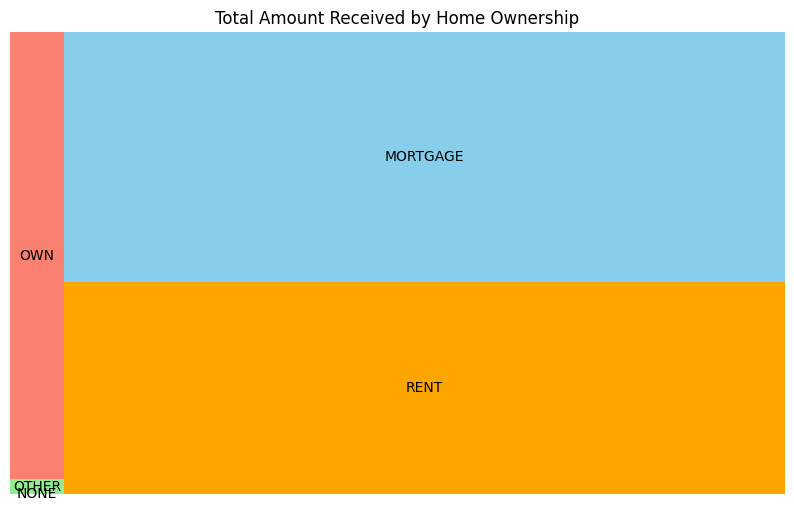

In [73]:
result = df.groupby('home_ownership').agg(
    total_amount_received=('total_payment', 'sum')
).sort_values(by='total_amount_received')

plt.figure(figsize=(10, 6))
squarify.plot(sizes=result['total_amount_received'], label=result.index, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Total Amount Received by Home Ownership')
plt.axis('off') 
plt.show()